First 5 Rows


<>:43: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
<>:43: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
C:\Users\f_alt\AppData\Local\Temp\ipykernel_2560\1969673407.py:43: SyntaxWarning: "\$" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\$"? A raw string is also an option.
  df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


Shape: (294, 14)

Data Types:
age             int64
sex             int64
cp              int64
trestbps          str
chol              str
fbs               str
restecg           str
thalach           str
exang             str
oldpeak       float64
slope             str
ca                str
thal              str
num             int64
dtype: object

Missing Values:
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
num           0
dtype: int64

Duplicate Rows: 1

After Cleaning Shape: (293, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,293.000000,293.000000,293.000000,293,293,293,293,293,293,293.000000,293,293,293,293.000000
unique,NaN,NaN,NaN,32,154,3,4,72,3,NaN,4,2,4,NaN
top,NaN,NaN,NaN,120,?,0,0,150,0,NaN,?,?,?,NaN
freq,NaN,NaN,NaN,65,22,265,234,29,203,NaN,189,290,265,NaN
mean,47.822526,0.726962,2.986348,NaN,NaN,NaN,NaN,NaN,NaN,0.588055,NaN,NaN,NaN,0.361775
std,7.824875,0.446282,0.965049,NaN,NaN,NaN,NaN,NaN,NaN,0.909554,NaN,NaN,NaN,0.481336
min,28.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,42.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
50%,49.000000,1.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000
75%,54.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000


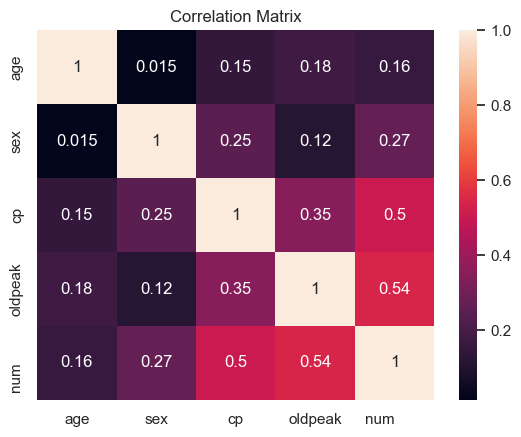

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# ======================
# 1. Load Data
# ======================

df = pd.read_csv("data.csv")

print("First 5 Rows")
display(df.head())

print("Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isna().sum())

print("\nDuplicate Rows:", df.duplicated().sum())


# ======================
# 2. Data Cleaning
# ======================

# Remove duplicates
df = df.drop_duplicates()

# Handle missing values (drop rows with missing critical data)
df = df.dropna()

# Convert Date column
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Clean Amount column
if 'Amount' in df.columns:
    df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True)
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

print("\nAfter Cleaning Shape:", df.shape)


# ======================
# 3. Statistical Summary
# ======================

display(df.describe(include='all'))


# ======================
# 4. Data Visualization
# ======================

# Histogram
if 'Boxes Shipped' in df.columns:
    plt.figure()
    sns.histplot(df['Boxes Shipped'], bins=20)
    plt.title("Distribution of Boxes Shipped")
    plt.show()

# Revenue by Product
if 'Product' in df.columns and 'Amount' in df.columns:
    product_revenue = df.groupby('Product')['Amount'].sum().sort_values(ascending=False)

    plt.figure()
    product_revenue.plot(kind='bar')
    plt.title("Revenue by Product")
    plt.ylabel("Revenue")
    plt.show()

# Correlation Matrix
numeric_cols = df.select_dtypes(include=np.number)

if len(numeric_cols.columns) > 1:
    plt.figure()
    sns.heatmap(numeric_cols.corr(), annot=True)
    plt.title("Correlation Matrix")
    plt.show()

# Monthly Revenue Trend
if 'Date' in df.columns and 'Amount' in df.columns:
    df['Month'] = df['Date'].dt.to_period('M')
    monthly_revenue = df.groupby('Month')['Amount'].sum()

    plt.figure()
    monthly_revenue.plot()
    plt.title("Monthly Revenue Trend")
    plt.ylabel("Revenue")
    plt.show()


# ======================
# 5. Basic Insights
# ======================

if 'Amount' in df.columns:
    print("\nTotal Revenue:", df['Amount'].sum())

if 'Boxes Shipped' in df.columns:
    print("Average Boxes Shipped:", df['Boxes Shipped'].mean())

if 'Product' in df.columns and 'Amount' in df.columns:
    print("Top Product by Revenue:", product_revenue.idxmax())
